This notebook compares TT spectra and P(k) between CLASS and CAMB, for reference spectra parameters (i.e. very high precision). 

Note that these plots below were generated with a CLASS input
```
"k_max_tau0_over_l_max":15.
```
but values of 10ish will work too.

This is a modified version of the original notebook to also compare with CLASS as called via CCL.  - Danielle

In [1]:
%matplotlib inline
import sys, platform, os
from matplotlib import pyplot as plt
import numpy as np
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
import camb
from camb import model, initialpower
import pyccl as ccl

In [2]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#camb.set_halofit_version('takahashi')
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.05, ombh2 = 0.02225, omch2 = 0.1198, 
                   tau=0.079, num_massive_neutrinos=0, mnu=0.0, 
                   standard_neutrino_neff=3.046)
pars.InitPower.set_params(As=2.2065e-9, ns=0.9645)
pars.set_for_lmax(4000, max_eta_k=12000, lens_potential_accuracy=4);
pars.set_accuracy(AccuracyBoost=3, lAccuracyBoost=3, lSampleBoost=3, DoLateRadTruncation=False )
pars.AccuratePolarization = True
pars.AccurateReionization = True
pars.YHe = 0.24
# pars.omegan = 0.0006445
pars.omegak = 0.
pars.set_nonlinear_lensing(True)


total
lens_potential
lensed_scalar
unlensed_scalar
unlensed_total
tensor
(4042, 4)


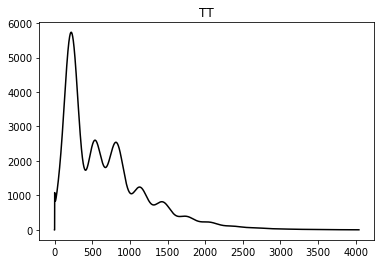

In [3]:

#calculate results for these parameters
results = camb.get_results(pars)

#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots()
ax.plot(ls,totCL[:,0],'k-')
ttCAMB = totCL[:,0]
ax.set_title('TT');

# P(k) Comparison
Next, we compare the linear P(k) and HALOFIT P(k). 

In [5]:
pars.set_matter_power(redshifts=[0.], kmax=2.0)
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())

# Compare P(k) with CCL 

In [11]:
# Via ccl:
h = 0.6705;
Omega_c = 0.1198/h**2; Omega_b = 0.02225/h**2;
As=2.2065e-9; ns = 0.9645;
cosmo_ccl = ccl.Cosmology(Omega_c=Omega_c , Omega_b=Omega_b, h=h,A_s=As, n_s=ns)
Pk_ccl = h**3*ccl.linear_matter_power(cosmo_ccl, kh*h, 1.)

Text(0,0.5,'$|\\Delta P(k)| / P(k)$')

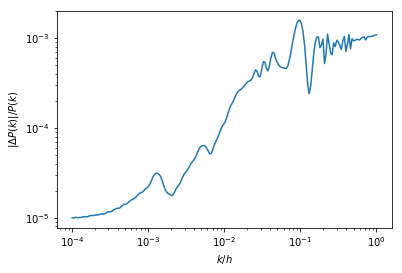

In [12]:
plt.loglog( kh, np.abs( (Pk_ccl - pk[0,:])/pk[0,:]   ) )
plt.xlabel(r'$k/h$')
plt.ylabel(r'$|\Delta P(k)| / P(k)$')